In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
N = 20    # number of walkers
Lx = 10
Ly = 20
stepSize = 0.5

tile_x_num = 10
tile_y_num = 20

pollution = np.zeros( (tile_x_num, tile_y_num),float )

tile_x_size = Lx / tile_x_num
tile_y_size = Ly / tile_y_num

colors = []
for i in range(N):
    colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))


In [132]:
agents = np.zeros((N), dtype=[('x', 'float'), ('y', 'float'), ('tile_x',int), ('tile_y',int), ('health',bool)] )

agents['x'] = np.random.random(N) * Lx
agents['y'] = np.random.random(N) * Ly


In [133]:

def walk():
    step = np.random.random(N) * 2.*np.pi
    dx = stepSize * np.cos(step)
    dy = stepSize * np.sin(step)
    agents['x'] += dx
    agents['y'] += dy
    passedRight = ((agents['x']+dx) > Lx)
    passedLeft = ((agents['x']+dx) < 0)
    passedTop = ((agents['y']+dy) > Ly)
    passedBottom = ((agents['y']+dy) < 0)
    agents['x'][passedRight] = 2.*Lx - dx[passedRight] - agents['x'][passedRight]
    agents['x'][passedLeft] = -dx[passedLeft] - agents['x'][passedLeft]
    agents['y'][passedTop] = 2.*Ly - dy[passedTop] - agents['y'][passedTop]
    agents['y'][passedBottom] = -dy[passedBottom] - agents['y'][passedBottom]
    #plt.scatter(r[:,0], r[:,1], c=colors, s=1.5)
    

def update_tile():
    agents['tile_x'] = agents['x'] / tile_x_size
    agents['tile_y'] = agents['y'] / tile_y_size
    #return np.array(  )

def pollute():
    polluted_x = agents['tile_x'][agents['health'] == 1]
    polluted_y = agents['tile_y'][agents['health'] == 1]
    pollution[ polluted_x, polluted_y ] = 1

In [134]:
pollute()

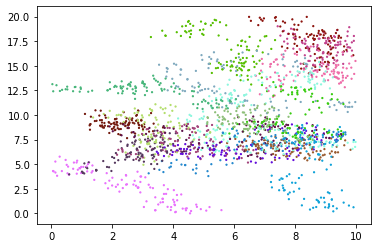

In [135]:
tMax = 100
step = np.zeros((N,2))

###initialize
infection_seed = np.random.randint(N)
update_tile()
agents['health'][infection_seed] = 1


for t in range(tMax):
    walk()
    update_tile()
    pollute()
    plt.scatter(agents['x'], agents['y'], c=colors, s=1.5)


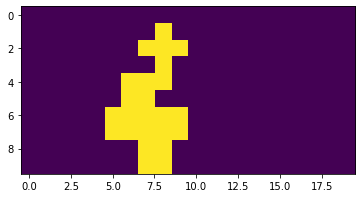

In [137]:
plt.imshow(pollution)